# Comparison of Fashion MNIST on Pytorch using 3 models

# Model 0: base model without non-linearity

# Model 1: base model with Non Linear activation functions are added(with non linearity)

# Model 2: CNN --> Tiny VGG Architecture from https://poloclub.github.io/cnn-explainer/
Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer



In [ ]:
!nvidia-smi

Fri Jun  9 12:30:18 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |   1125MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import torch
from torch import nn


In [ ]:
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from torchvision import datasets

train_data = datasets.FashionMNIST(root='data',
                                  train = True,
                                  download=True,
                                  transform=torchvision.transforms.ToTensor(),
                                  target_transform=None)

test_data = datasets.FashionMNIST(root='data',
                                 train = False,
                                 download = True,
                                 transform=ToTensor(),
                                 target_transform=None)

In [ ]:
class_name=train_data.classes
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets


tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image, label = train_data[0]
image

tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
          0.2863, 0.0000, 0.0000, 0.0039, 0.0157, 0.0000,

In [ ]:
image.shape

torch.Size([1, 28, 28])

Text(0.5, 1.0, 'Ankle boot')

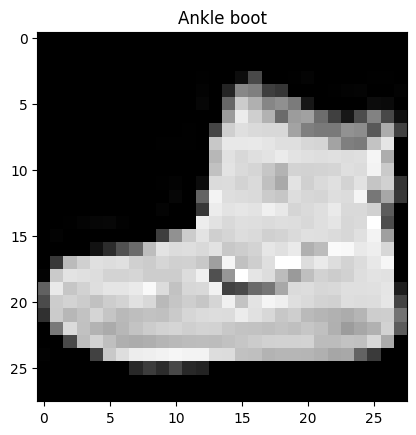

In [ ]:

plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_name[label])

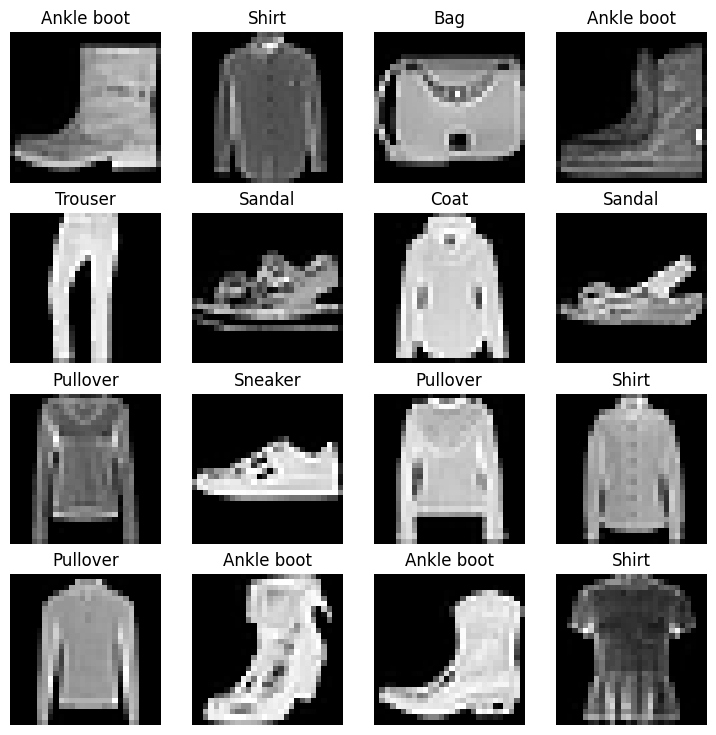

In [ ]:
#plot more images

torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx =  torch.randint(0, len(train_data),size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows,cols,i)
  plt.imshow(img.squeeze(), cmap = 'gray')
  plt.title(class_name[label])
  plt.axis(False);



Dataloaders----> turn data into mini Batches



In [ ]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset = train_data,batch_size=32, shuffle=True)
test_dataloader = DataLoader(dataset = test_data,batch_size=32, shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fd571eaf070>,
 <torch.utils.data.dataloader.DataLoader at 0x7fd571eaee90>)

In [ ]:
len(train_dataloader)

1875

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch

tensor([[[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0157, 0.0000, 0.0039],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..

Image Size: torch.Size([1, 28, 28])
Label:5,label size:torch.Size([])


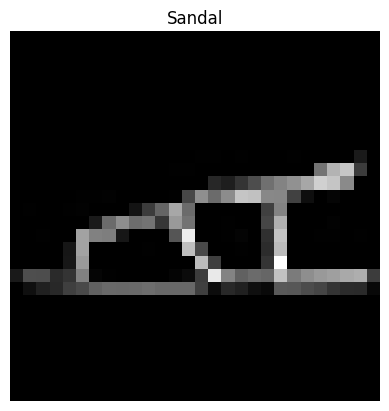

In [ ]:
torch.manual_seed(64)
random_idx = torch.randint(0, len(train_features_batch),size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(),cmap = 'gray')
plt.title(class_name[label])
plt.axis(False)
print(f"Image Size: {img.shape}")
print(f"Label:{label},label size:{label.shape}")

# Model_0: Baseline model

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]

output = flatten_model(x)

print(f"shape before flattening {x.shape}")
print(f"shape after flattening {output.shape}")

shape before flattening torch.Size([1, 28, 28])
shape after flattening torch.Size([1, 784])


In [ ]:
from torch import nn

class Fashionmodel_V0(nn.Module):
  def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units,out_features=output_shape)
                                     )

  def forward(self, x):
    return self.layer_stack(x)




In [ ]:
torch.manual_seed(64)
model_0 = Fashionmodel_V0(input_shape=784, hidden_units=8 , output_shape=len(class_name)).to("cpu")
model_0

Fashionmodel_V0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [ ]:
rand = torch.rand([1,1,28,28])
model_0(rand)

tensor([[-0.2880, -0.1511,  0.1973,  0.2939,  0.5272,  0.0556, -0.2915, -0.1170,
          0.1006, -0.0987]], grad_fn=<AddmmBackward0>)

In [ ]:
 model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0322,  0.0071, -0.0231,  ...,  0.0220,  0.0202,  0.0228],
                      [-0.0071,  0.0200,  0.0212,  ...,  0.0344, -0.0145,  0.0339],
                      [ 0.0288, -0.0138,  0.0009,  ...,  0.0320, -0.0183,  0.0252],
                      ...,
                      [ 0.0270,  0.0037,  0.0139,  ...,  0.0210,  0.0279,  0.0007],
                      [-0.0026,  0.0172, -0.0295,  ..., -0.0146, -0.0316,  0.0231],
                      [ 0.0005, -0.0263, -0.0094,  ..., -0.0219,  0.0224,  0.0078]])),
             ('layer_stack.1.bias',
              tensor([-0.0183,  0.0020,  0.0049,  0.0276, -0.0304,  0.0222, -0.0265,  0.0062])),
             ('layer_stack.2.weight',
              tensor([[ 0.2958, -0.1539, -0.0041, -0.2944, -0.1206, -0.0991,  0.3207,  0.2780],
                      [ 0.2439,  0.1354, -0.0397, -0.1511, -0.3463, -0.2436,  0.1335,  0.1234],
                      [-0.2730, -0.2063, -0.1952, -0.0389,  0.232

# Accuracy Function - Helper function

In [ ]:
def accuracy_fn(y_true, y_pred):
    """Calculates accuracy between truth labels and predictions.

    Args:
        y_true (torch.Tensor): Truth labels for predictions.
        y_pred (torch.Tensor): Predictions to be compared to predictions.

    Returns:
        [torch.float]: Accuracy value between y_true and y_pred, e.g. 78.45
    """
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc


# Setup Loss and Optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(),lr = 0.1)


In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end:float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time



In [ ]:
start_time = timer()
"""
some code
"""
end_time = timer()

print_train_time(start=start_time, end = end_time, device = "cpu")


Train time on cpu: 0.000 seconds


8.493800032738363e-05

# Training Loop

In [ ]:
from tqdm.auto import tqdm

torch.manual_seed(64)
start_time_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #forward pass
    y_pred = model_0(X)

    loss = loss_fn(y_pred, y)
    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()


    if batch % 400 == 0:
     print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)}samples.")

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0,0

  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test) #forward pass
      test_loss += loss_fn(test_pred,y_test) #calculate loss (accumatively)
      test_acc +=  accuracy_fn(y_true = y_test, y_pred=test_pred.argmax(dim=1)) # calculate accuracy
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\ntrain loss: {train_loss:.4f} | Test loss :{test_loss:.4f}, Test acc: {test_acc:.4f}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=start_time_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))






  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

train loss: 0.5955 | Test loss :0.5212, Test acc: 81.7692
Epoch: 1
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

train loss: 0.4866 | Test loss :0.4823, Test acc: 83.4165
Epoch: 2
-----
Looked at 0/60000samples.
Looked at 12800/60000samples.
Looked at 25600/60000samples.
Looked at 38400/60000samples.
Looked at 51200/60000samples.

train loss: 0.4639 | Test loss :0.4873, Test acc: 83.0771
Train time on cpu: 31.106 seconds


In [ ]:
str(next(model_0.parameters()).device)

'cpu'

# Make Prediction and get model_0 results

In [ ]:
torch.manual_seed(13)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))


    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,# only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc
         }

model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Fashionmodel_V0',
 'model_loss': 0.4872579276561737,
 'model_acc': 83.0770766773163}

# setup device agnostic code

In [ ]:
torch.cuda.is_available()
# Setup device-agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

model_1: Model with non linearity

In [ ]:
class Fashionmodel_V1(nn.Module):
  def __init__(self,input_shape: int,hidden_units: int,output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape,out_features=hidden_units),
                                     nn.ReLU(),
                                     nn.Linear(in_features=hidden_units,out_features=output_shape),
                                     nn.ReLU(),
                                     )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(13)
model_1 = Fashionmodel_V1(input_shape = 784,
                          hidden_units=10,
                          output_shape = len(class_name)).to(device)

next(model_1.parameters()).device


device(type='cuda', index=0)

Setup loss, optimizer and evaluation metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss() # measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), # tries to update our model's parameters to reduce the loss
                            lr=0.1)

# Functionizing training and evaluation/testing loops

## Train Step

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  train_loss,train_acc = 0,0
  model.train()

  for batch , (X,y) in enumerate(data_loader):

    X,y = X.to(device), y.to(device) # put data on target device -GPU cuda

    y_pred = model(X) #Forward pass (outputs the raw logits from the model)

    loss = loss_fn(y_pred, y) #Calculate loss and accuracy (per batch)

    train_loss += loss ## accumulate train loss
    train_acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1)) # go from logits -> prediction labels


    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)

  print(f"Train Loss: {train_loss:.5f}, Train Accuracy: {train_acc:.2f}%")





## Test Step

In [ ]:
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
  test_loss,test_acc = 0,0
  model.eval()

  with torch.inference_mode():
    for X, y in data_loader:
       X,y = X.to(device), y.to(device) # put data on target device -GPU cuda

       test_pred = model(X) #Forward pass (outputs the raw logits from the model)

       loss = loss_fn(test_pred, y) #Calculate loss and accuracy (per batch)

       test_loss += loss ## accumulate train loss
       test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1)) # go from logits -> prediction labels

    test_loss /= len(data_loader)
    test_acc/= len(data_loader)
    print(f"\nTest Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%\n")

In [ ]:
torch.manual_seed(13)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------")
  train_step(model = model_1,
             data_loader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device=device)
  test_step(model = model_1,
             data_loader = test_dataloader,
             loss_fn = loss_fn,
             accuracy_fn = accuracy_fn,
             device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------
Train Loss: 0.93703, Train Accuracy: 65.40%

Test Loss: 0.77074, Test Accuracy: 71.93%

Epoch: 1
------
Train Loss: 0.69496, Train Accuracy: 73.73%

Test Loss: 0.69765, Test Accuracy: 73.10%

Epoch: 2
------
Train Loss: 0.66225, Train Accuracy: 74.98%

Test Loss: 0.70476, Test Accuracy: 73.75%

Train time on cuda: 34.778 seconds


In [ ]:
torch.manual_seed(13)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader):
       # Make our data device agnostic
      X, y = X.to(device), y.to(device)
      y_pred = model(X)

      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true = y, y_pred = y_pred.argmax(dim=1))


    loss /= len(data_loader)
    acc /= len(data_loader)

  return{"model_name": model.__class__.__name__,# only works when model was created with a class
         "model_loss": loss.item(),
         "model_acc": acc
         }

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Fashionmodel_V1',
 'model_loss': 0.704755961894989,
 'model_acc': 73.75199680511182}

# Comparison of models with and without non linearity

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots


# Create subplots, 2 rows, 1 column
fig = make_subplots(rows=2, cols=1)

# Add trace for accuracy
fig.add_trace(go.Bar(x=[model_1_results['model_name'], model_0_results['model_name']],
                     y=[model_1_results['model_acc'], model_0_results['model_acc']],
                     name='Model Accuracy'),
              row=1, col=1)

# Add trace for loss
fig.add_trace(go.Bar(x=[model_1_results['model_name'], model_0_results['model_name']],
                     y=[model_1_results['model_loss'], model_0_results['model_loss']],
                     name='Model Loss'),
              row=2, col=1)

# Update xaxis properties
fig.update_xaxes(title_text="Model Name", row=1, col=1)
fig.update_xaxes(title_text="Model Name", row=2, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Model Accuracy", row=1, col=1)
fig.update_yaxes(title_text="Model Loss", row=2, col=1)

# Update title and size
fig.update_layout(title_text="Comparison of Model Accuracy and Loss", height=700)

fig.show()


Model 2: Convolution Neural Network

In [ ]:
class Fashionmodel_V2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):

    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    # print(f"Output shape of conv_block_1: {x.shape}") #to test random image tensor
    x = self.conv_block2(x)
    # print(f"Output shape of conv_block_2: {x.shape}")#to test random image tensor
    x = self.classifier(x)
    # print(f"Output shape of classifier: {x.shape}")#to test random image tensor
    return x

In [ ]:
torch.manual_seed(13)
model_2 = Fashionmodel_V2(input_shape = 1,
                          hidden_units=10,
                          output_shape = len(class_name)).to(device)


test a random image tensor

In [ ]:
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor=rand_image_tensor.unsqueeze(0)

In [ ]:
# Pass image through model
model_2(rand_image_tensor.to(device))

tensor([[ 0.0225, -0.0429, -0.0594, -0.2037, -0.0441,  0.0834, -0.0077, -0.0445,
         -0.0346, -0.0063]], device='cuda:0', grad_fn=<AddmmBackward0>)

In [ ]:
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params = model_2.parameters(),lr=0.1)



In [ ]:
torch.manual_seed(13)
torch.cuda.manual_seed(13)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()


epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader = train_dataloader,
             loss_fn=loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device
             )
  test_step(model=model_2,
            data_loader = test_dataloader,
            loss_fn=loss_fn ,
            accuracy_fn = accuracy_fn,
            device = device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                            end=train_time_end_model_2,
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train Loss: 0.60728, Train Accuracy: 77.97%

Test Loss: 0.46914, Test Accuracy: 82.94%

Train time on cuda: 13.625 seconds
Epoch: 1
-------
Train Loss: 0.35047, Train Accuracy: 87.42%

Test Loss: 0.34225, Test Accuracy: 87.70%

Train time on cuda: 27.036 seconds
Epoch: 2
-------
Train Loss: 0.30718, Train Accuracy: 88.93%

Test Loss: 0.34033, Test Accuracy: 88.13%

Train time on cuda: 40.143 seconds


In [ ]:
model_2_results = eval_model(
     model=model_2,
     data_loader=test_dataloader,
     loss_fn=loss_fn,
     accuracy_fn=accuracy_fn,
     device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Fashionmodel_V2',
 'model_loss': 0.34033453464508057,
 'model_acc': 88.12899361022365}

Compare model results and training time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,Fashionmodel_V0,0.487258,83.077077,31.105863
1,Fashionmodel_V1,0.704756,73.751997,34.777630
2,Fashionmodel_V2,0.340335,88.128994,40.143163


Visualize Models


In [ ]:
import plotly.subplots as sp
import plotly.graph_objects as go

# Create subplots: 3 rows, 1 column
fig = sp.make_subplots(rows=3, cols=1)

# Add traces
fig.add_trace(go.Scatter(x=compare_results['model_name'], y=compare_results['model_loss'], mode='lines+markers', name='model_loss'), row=1, col=1)
fig.add_trace(go.Scatter(x=compare_results['model_name'], y=compare_results['model_acc'], mode='lines+markers', name='model_acc'), row=2, col=1)
fig.add_trace(go.Scatter(x=compare_results['model_name'], y=compare_results['training_time'], mode='lines+markers', name='training_time'), row=3, col=1)

# Update yaxis properties
fig.update_yaxes(title_text="Model Loss", row=1, col=1)
fig.update_yaxes(title_text="Model Accuracy", row=2, col=1)
fig.update_yaxes(title_text="Training Time", row=3, col=1)

# Update layout
fig.update_layout(height=600, width=600, title_text="Model Comparison")

# Show plot
fig.show()

# Make and evaluate random predictions with best model

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device = device):
  prediction_probs = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim = 0).to(device) #add extra dim for conv2d
      pred_logit = model(sample) # Forward Pass (model output raw logits)

      # Get prediction probability (logit -> prediction probability)
      prediction_prob = torch.softmax(pred_logit.squeeze(), dim = 0)

      # Get pred_prob off GPU for further calculations

      prediction_probs.append(prediction_prob.cpu())
  # Stack the pred_probs to turn list into a tensor
  return torch.stack(prediction_probs)


In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_name[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[3.1702e-08, 7.7343e-10, 3.4906e-08, 1.0131e-09, 9.8138e-09, 9.9995e-01,
         4.0244e-07, 1.2042e-05, 2.8320e-06, 3.8170e-05],
        [7.1043e-02, 3.0320e-01, 2.4821e-04, 9.4720e-02, 4.2939e-01, 2.4582e-04,
         8.8939e-02, 1.8468e-03, 9.6836e-03, 6.8257e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 4, 7, 4, 3, 0, 4, 7, 1])

In [ ]:
test_labels, pred_classes

([5, 1, 7, 4, 3, 0, 4, 7, 1], tensor([5, 4, 7, 4, 3, 0, 4, 7, 1]))

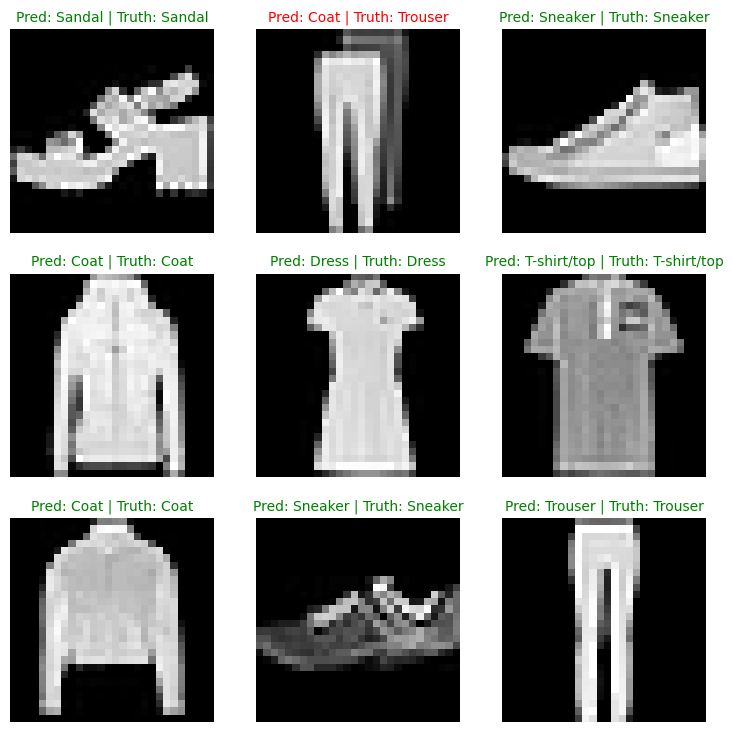

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_name[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_name[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## Plot Confusion Matrix --> Make predictions with our trained model, model_2 (a confusion matrix compares predictions to true labels)--> Make a confusion matrix using torchmetrics.ConfusionMatrix --> Plot the confusion matrix using mlxtend.plotting.plot_confusion_matrix().

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 71.0 MB/s eta 0:00:00
mlxtend version: 0.22.0


In [ ]:
# Import mlxtend upgraded version
import mlxtend
print(mlxtend.__version__)
assert int(mlxtend.__version__.split(".")[1]) >= 19 # should be version 0.19.0 or higher

0.22.0


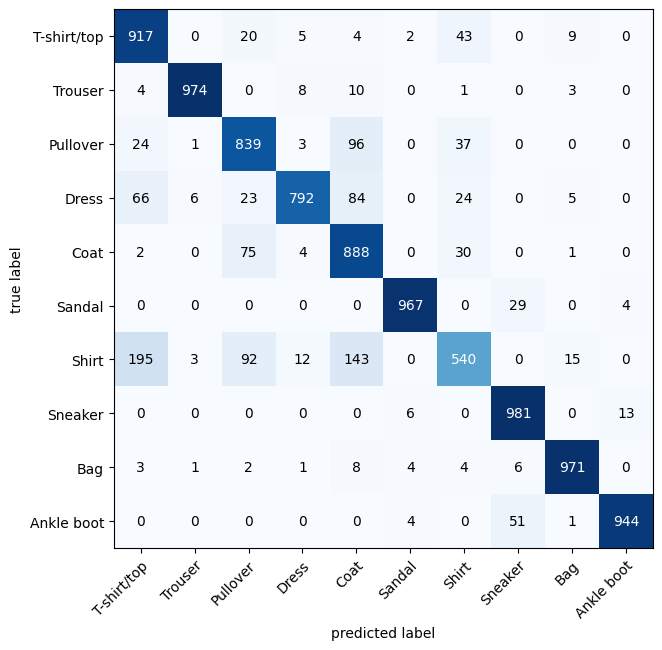

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_name), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_name, # turn the row and column labels into class names
    figsize=(10, 7)
);

Save the best performing model

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "Fashion_Mnist_CNN_TinyVGG_Architecture.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/Fashion_Mnist_CNN_TinyVGG_Architecture.pth


In [ ]:
# Create a new instance of Fashionmodel_V2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = Fashionmodel_V2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Create a new instance of Fashionmodel_V2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = Fashionmodel_V2(input_shape=1,
                                    hidden_units=10, # try changing this to 128 and seeing what happens
                                    output_shape=10)

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

In [ ]:
# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'Fashionmodel_V2',
 'model_loss': 0.34033453464508057,
 'model_acc': 88.12899361022365}

In [ ]:
model_2_results

{'model_name': 'Fashionmodel_V2',
 'model_loss': 0.34033453464508057,
 'model_acc': 88.12899361022365}

Check tensors are close


In [ ]:
# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

tensor(True)